<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/prueba_4_v2/PRUEBA_SIMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba SimPy
## Ivan Ulloa

In [1]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
MEDIA_REV = 20
STDD_REV = 10
CANT_PESADO=0.15 # cantidad de vehiculos pesados en la poblacion
PROB_PESADO=0.15
LLEGADA = 3
INT_ESTACIONAR = [3,5] 
INT_TURNO = [1,3] 
INT_PAG_MATR = [5,10] 
INT_SELLO = [1,3]
INT_SALIDA = [5,10]
DIAS = 30
TIEMPO_SIMULACION = DIAS * 8 * 60 # Se asume que la empresa abre por 8 horas cada dia

bernoulli = stats.bernoulli(CANT_PESADO)
distribucion = bernoulli.rvs(100) # Universo arbitrario

In [4]:
def tiempo_revision():
    return abs(random.normalvariate(MEDIA_REV, STDD_REV))

def vehiculo_pesado():
    contagios=stats.bernoulli(PROB_PESADO)
    return contagios.rvs(1)[0]

In [12]:
class RevisionVehicular(object):
    
    def __init__(self, environment, nombre):
        self.env=environment
        self.carril = simpy.Resource(environment, capacity=1)
        self.nombre = nombre
    
    def estacionar_vehiculo(self, vehiculo):
        yield self.env.timeout(random.randint(INT_ESTACIONAR[0], INT_ESTACIONAR[1]))
        print(f'Vehiculo {vehiculo} termina de estacionarse en el tiempo {self.env.now}')

    def sacar_turno(self, vehiculo):
        yield self.env.timeout(random.randint(INT_TURNO[0], INT_TURNO[1]))
        print(f'Vehiculo {vehiculo} saca turno en el tiempo {self.env.now} CARRIL={self.nombre}')
    
    def pagar_matricula(self, vehiculo):
        yield self.env.timeout(random.randint(INT_PAG_MATR[0], INT_PAG_MATR[1]))
        print(f'Vehiculo {vehiculo} se matricula en el tiempo {self.env.now} CARRIL={self.nombre}')

    def pegar_sello(self, vehiculo):
        yield self.env.timeout(random.randint(INT_PAG_MATR[0], INT_PAG_MATR[1]))
        print(f'Se pone el sello en el vehiculo {vehiculo} TIEMPO= {self.env.now} CARRIL={self.nombre}')

    def salida_vehiculo(self, vehiculo):
        yield self.env.timeout(random.randint(INT_SALIDA[0], INT_SALIDA[1]))
        print(f'Salida del vehiculo {vehiculo} del carril {self.nombre} TIEMPO={self.env.now} CARRIL={self.nombre}')

    def recurso_revision(self, vehiculo):
        with self.carril.request() as peticion:
          yield peticion   
          yield self.env.timeout(tiempo_revision())
          print(f'Culmina la revision del {vehiculo} en el carril {self.nombre} TIEMPO={self.env.now}')
          self.carril.release(peticion)       

def llegada_vehiculo(env, nombre, revision): 
    yield env.process(revision.estacionar_vehiculo(nombre))
    yield env.process(revision.sacar_turno(nombre))
    yield env.process(revision.pagar_matricula(nombre))
    yield env.process(revision.recurso_revision(nombre))
    yield env.process(revision.pegar_sello(nombre))
    yield env.process(revision.salida_vehiculo(nombre))

def ejecutar_simulacion_1(env, nombre):
    revision=RevisionVehicular(env, nombre)
    i=0
    
    while True:
        yield env.timeout(LLEGADA)
        print(f'Llegada del vehiculo {i} del carril {nombre} TIEMPO={env.now}')
        i+=1
        proceso = [env.process(llegada_vehiculo(env, i, revision)), env.process(llegada_vehiculo(env, i, revision))]
        tiempo_1[env.now] = nombre
    
def ejecutar_simulacion_2(env, nombre):
    revision=RevisionVehicular(env, nombre)
    i=0
    
    while True:
        yield env.timeout(LLEGADA)
        print(f'Llegada del vehiculo {i} del carril {nombre} TIEMPO={env.now}')
        i+=1
        proceso = [env.process(llegada_vehiculo(env, i, revision)), env.process(llegada_vehiculo(env, i, revision))]
        tiempo[env.now] = nombre

def ejecutar_simulacion_pesado(env, nombre):
    revision=RevisionVehicular(env, nombre)
    i=0
    
    while True:
        yield env.timeout(LLEGADA)
        print(f'Llegada del vehiculo pesado {i} del carril {nombre} TIEMPO={env.now}')
        i+=1
        if vehiculo_pesado() == 1:
          proceso = [env.process(llegada_vehiculo(env, i, revision)), env.process(llegada_vehiculo(env, i, revision))]
          tiempo[env.now] = nombre

In [13]:
tiempo={}
tiempo_1={}

env = simpy.Environment()
env.process(ejecutar_simulacion_1(env, 'carril 1'))
env.process(ejecutar_simulacion_2(env, 'carril 2'))
env.process(ejecutar_simulacion_pesado(env, 'carril 3'))

env.run(until = TIEMPO_SIMULACION)

Se han truncado las últimas 5000 líneas del flujo de salida.
Vehiculo 4509 termina de estacionarse en el tiempo 13530
Vehiculo 4509 termina de estacionarse en el tiempo 13530
Llegada del vehiculo pesado 4509 del carril carril 3 TIEMPO=13530
Vehiculo 4508 saca turno en el tiempo 13530 CARRIL=carril 1
Salida del vehiculo 331 del carril carril 1 TIEMPO=13530.149326120907 CARRIL=carril 1
Vehiculo 4508 saca turno en el tiempo 13531 CARRIL=carril 2
Vehiculo 4505 se matricula en el tiempo 13532 CARRIL=carril 2
Vehiculo 4509 termina de estacionarse en el tiempo 13532
Vehiculo 4509 termina de estacionarse en el tiempo 13532
Vehiculo 4509 saca turno en el tiempo 13532 CARRIL=carril 2
Vehiculo 4506 se matricula en el tiempo 13533 CARRIL=carril 1
Vehiculo 4507 se matricula en el tiempo 13533 CARRIL=carril 2
Llegada del vehiculo 4510 del carril carril 1 TIEMPO=13533
Vehiculo 4510 termina de estacionarse en el tiempo 13533
Llegada del vehiculo 4510 del carril carril 2 TIEMPO=13533
Llegada del vehicu

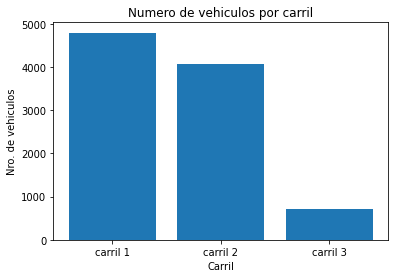

In [7]:
c1=0
c2=0
c3=0
carriles=['carril 1', 'carril 2', 'carril 3']

for key in tiempo:
  if tiempo[key] == carriles[1]:
    c2+=1 

  if tiempo[key] == carriles[2]:
    c3+=1 

for key in tiempo_1:
  c1+=1
     

plt.bar(carriles, [c1, c2, c3])
plt.title("Numero de vehiculos por carril")
plt.xlabel("Carril")
plt.ylabel("Nro. de vehiculos")
plt.show()

## Conclusiones
La gráfica nos muestra que el uso del carril 3 podría ser más eficiente y dar paso a otro vehículos realizando más revisiones en el día que manteniendolo cerrado completament. Puede utilizarse un sistema que de prioridad a los vehículos pesados sin dejar a los otros vehículos fuera de la posibilidad de realizar la revisión en esa plataforma.